# Challenge 

Create a machine-learning model that predicts the price range of a property based on the information available. The data set contains 10,000 rows (1 row for each property). After training, you should export your model (with all other components you might need) and deploy it into a function or app. 

In [1]:
# libraries
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv("train.csv")
print(df.describe())
print(df.shape)

                uid      latitude     longitude  garageSpaces     yearBuilt  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    7626.621900     30.291191    -97.778476      1.229600   1988.570400   
std     4380.486852      0.097075      0.084543      1.328179     21.515272   
min        1.000000     30.085030    -98.020477      0.000000   1905.000000   
25%     3838.750000     30.202516    -97.838594      0.000000   1975.000000   
50%     7603.500000     30.283664    -97.769680      1.000000   1993.000000   
75%    11435.750000     30.366375    -97.718313      2.000000   2006.000000   
max    15170.000000     30.517323    -97.570633     22.000000   2020.000000   

       numOfPatioAndPorchFeatures   lotSizeSqFt  avgSchoolRating  \
count                10000.000000  1.000000e+04     10000.000000   
mean                     0.667200  2.071028e+04         5.766236   
std                      0.986378  4.488338e+05         1.861940   
min             

In [3]:
df.isna().sum()

uid                           0
city                          0
description                   1
homeType                      0
latitude                      0
longitude                     0
garageSpaces                  0
hasSpa                        0
yearBuilt                     0
numOfPatioAndPorchFeatures    0
lotSizeSqFt                   0
avgSchoolRating               0
MedianStudentsPerTeacher      0
numOfBathrooms                0
numOfBedrooms                 0
priceRange                    0
dtype: int64

In [4]:
print(df.duplicated().sum())

0


Aditionally, walk us through your approach to applying NLP to our property dataset, specifically focusing on the description field. How you would preprocess the text and then proceed through feature extraction, integration with other features and model training,

In [5]:
print(df.dtypes)

uid                             int64
city                           object
description                    object
homeType                       object
latitude                      float64
longitude                     float64
garageSpaces                    int64
hasSpa                           bool
yearBuilt                       int64
numOfPatioAndPorchFeatures      int64
lotSizeSqFt                   float64
avgSchoolRating               float64
MedianStudentsPerTeacher        int64
numOfBathrooms                float64
numOfBedrooms                   int64
priceRange                     object
dtype: object


In [6]:
df.priceRange.unique()

array(['650000+', '350000-450000', '0-250000', '450000-650000',
       '250000-350000'], dtype=object)

<Axes: ylabel='priceRange'>

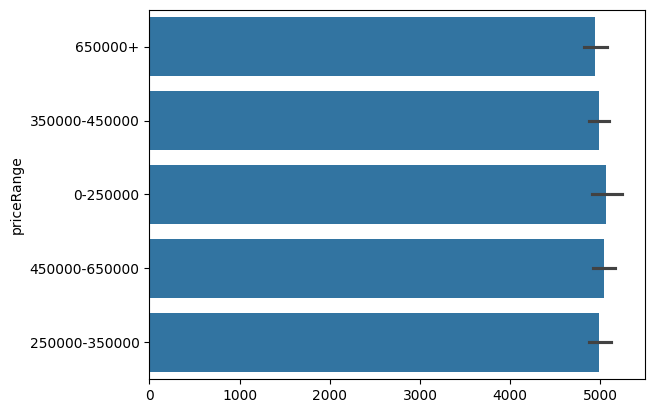

In [7]:
sns.barplot(df.priceRange)

In [8]:
df_two = df.dropna().copy()
df_two.shape

(9999, 16)

In [9]:
df.description.head(3)

0    MULTIPLE OFFERS submit best & final to Agent b...
1    4644 Hoffman Dr, Austin, TX 78749 is a single ...
2    6804 Canal St, Austin, TX 78741 is a single fa...
Name: description, dtype: object

In [10]:
import nltk

# Download the necessary NLTK data files
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df_two["description"] = df_two["description"].str.lower()

In [12]:
df_two["description"] = df_two["description"].apply(lambda x: re.sub(r"[^a-z\s$!]", "", x))
df_two.description.head(3)

0    multiple offers submit best  final to agent by...
1     hoffman dr austin tx  is a single family home...
2     canal st austin tx  is a single family home t...
Name: description, dtype: object

In [13]:
from nltk.tokenize import word_tokenize

df_two["description"] = df_two["description"].apply(word_tokenize)

In [14]:
print(df_two["description"].head(5))

0    [multiple, offers, submit, best, final, to, ag...
1    [hoffman, dr, austin, tx, is, a, single, famil...
2    [canal, st, austin, tx, is, a, single, family,...
3    [beautiful, large, lot, with, established, tre...
4    [stunning, nw, hills, designer, remodel, by, c...
Name: description, dtype: object


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
df_two["description"] = df_two["description"].apply(lambda x: [word for word in x if word not in stop_words])

In [15]:
from nltk.stem import PorterStemmer
# Stem each token to reduce words to their base form
stemmer = PorterStemmer()
df_two["description"]= df_two["description"].apply(lambda x: [stemmer.stem(word) for word in x])
print(df_two["description"].head(5))

0    [multipl, offer, submit, best, final, to, agen...
1    [hoffman, dr, austin, tx, is, a, singl, famili...
2    [canal, st, austin, tx, is, a, singl, famili, ...
3    [beauti, larg, lot, with, establish, tree, lov...
4    [stun, nw, hill, design, remodel, by, cedar, a...
Name: description, dtype: object


In [37]:
# Rejoin tokens into a single string for feature extraction
df_two["description"] = df_two["description"].apply(lambda x: " ".join(x))

In [47]:
df_two["description"] 

0       m u l t i p l   o f f e r   s u b m i t   b e ...
1       h o f f m a n   d r   a u s t i n   t x   i s ...
2       c a n a l   s t   a u s t i n   t x   i s   a ...
3       b e a u t i   l a r g   l o t   w i t h   e s ...
4       s t u n   n w   h i l l   d e s i g n   r e m ...
                              ...                        
9995    u p d a t   g r e a t   h i l l   o p p o r t ...
9996    a d o r   i n   t h e   h e a r t   o f   s o ...
9997    g a i n   m i l l   l n   a u s t i n   t x   ...
9998    d o e   v a l l e y   l n   a u s t i n   t x ...
9999    b e a u t i   s i n g l e s t o r i   h o m e ...
Name: description, Length: 9999, dtype: object

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [45]:
wordcloud = WordCloud().generate(' '.join(df_two["description"]))

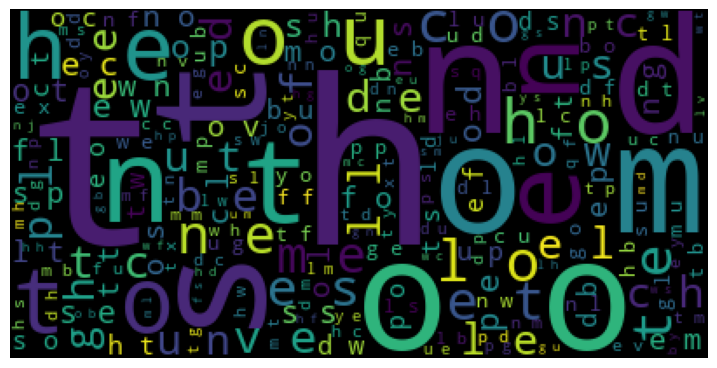

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 9))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()